<a href="https://colab.research.google.com/github/xBrymer/COVID19-AI-CT-Scan-Detection/blob/master/preprocessing_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import shutil
import os

from os.path import join
from zipfile import ZipFile

from skimage.io import imread
from skimage import exposure, color, img_as_ubyte, img_as_uint
from skimage.transform import resize

import cv2
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

import random

import PIL.Image as pil_image
import io
import numpy as np

from skimage import exposure

import cv2

# Preprocessing the training dataset

In [2]:
ds_dir = '/content/datasets'

training_dir = join(ds_dir, 'training')
training_covid_dir = join(ds_dir, 'training', 'covid')
training_normal_dir = join(ds_dir, 'training', 'normal')

testing_dir = join(ds_dir, 'testing')
testing_covid_dir = join(ds_dir, 'testing', 'covid')
testing_normal_dir = join(ds_dir, 'testing', 'normal')

validation_dir = join(ds_dir, 'validation')
validation_covid_dir = join(ds_dir, 'validation', 'covid')
validation_normal_dir = join(ds_dir, 'validation', 'normal')

In [3]:
dirs = [ds_dir, training_dir, training_covid_dir, training_normal_dir,
       testing_dir, testing_covid_dir, testing_normal_dir,
       validation_dir, validation_covid_dir, validation_normal_dir]

In [4]:
for dir in dirs:
  try:
    os.mkdir(dir)
  except:
    pass

In [5]:
raw_dir = '/content/raw'
ext_dir = '/content/raw/extracted'
temp_dir = '/content/raw/temp'
temp_covid_dir = '/content/raw/temp/covid'
temp_normal_dir = '/content/raw/temp/normal'
trans_dir = '/content/raw/transcoded'
preprocess_dir = '/content/raw/preprocessed'


temp_dirs = [raw_dir, ext_dir, temp_dir, temp_covid_dir, temp_normal_dir, trans_dir, 
             preprocess_dir]

for dir in temp_dirs:
  try:
    os.mkdir(dir)
  except:
    pass


In [6]:
path = '/content/drive/My Drive/External Datasets/COVID19-Project/COVID19-CT-SCANS- Train&Validation.zip'
f = ZipFile(path, 'r')
f.extractall(ext_dir)

In [7]:
for image in tqdm(os.listdir(ext_dir)):
  if 'covid' in image:
      shutil.move(join(ext_dir, image), join(temp_covid_dir, image))
  if 'normal' in image:
      shutil.move(join(ext_dir, image), join(temp_normal_dir, image))

In [8]:
difference = len(os.listdir(temp_normal_dir)) - len(os.listdir(temp_covid_dir))
print(difference)

7494


In [9]:
for i in tqdm(range(difference)):
  image = random.choice(os.listdir(temp_normal_dir))

  os.remove(join(temp_normal_dir, image))

In [10]:
difference_now = len(os.listdir(temp_normal_dir)) - len(os.listdir(temp_covid_dir))
print(difference_now)

0


In [11]:
def transcode(source, destination):
  for image in tqdm(os.listdir(source)):
      path = join(source, image)
      save_path= join(destination, image)
                      
      with open(path, 'rb') as f:
          tif = pil_image.open(io.BytesIO(f.read()))
      array=np.array(tif)
      max_val=np.amax(array)
      normalized=(array/max_val)
      im = pil_image.fromarray(normalized)
      os.remove(path)
      im.save(save_path) 

In [12]:
transcode(temp_normal_dir, trans_dir)
transcode(temp_covid_dir, trans_dir)

In [21]:
for image in tqdm(os.listdir(trans_dir)):
  if 'covid' in image:
      shutil.move(join(trans_dir, image), join(temp_covid_dir, image))
  if 'normal' in image:
      shutil.move(join(trans_dir, image), join(temp_normal_dir, image))

In [37]:
def preprocess(source, destination):
  CLIP_LIMIT = 2.0
  for image in tqdm(os.listdir(source)):
    path = join(source, image)

    img = cv2.imread(path, -1)
    conv_img = img_as_ubyte(img)

    clahe = cv2.createCLAHE(clipLimit=CLIP_LIMIT, tileGridSize=(8, 8))
    cl1 = clahe.apply(conv_img)

    os.chdir(destination)
    cv2.imwrite(f'CLAHE-{image}', cl1)
  
  return
      
  


In [38]:
print(len(os.listdir(temp_covid_dir)))

2282


In [39]:
preprocess(temp_covid_dir, training_covid_dir)
preprocess(temp_normal_dir, training_normal_dir)

In [48]:
print(os.listdir(training_covid_dir))

['CLAHE-137covid_patient105_SR_3_IM00013.tif', 'CLAHE-137covid_patient13_SR_4_IM00024.tif', 'CLAHE-137covid_patient15_SR_4_IM00010.tif', 'CLAHE-157covid_patient141_SR_4_IM00020.tif', 'CLAHE-137covid_patient59_SR_2_IM00040.tif', 'CLAHE-137covid_patient70_SR_4_IM00077.tif', 'CLAHE-137covid_patient63_SR_3_IM00006.tif', 'CLAHE-137covid_patient69_SR_3_IM00005.tif', 'CLAHE-137covid_patient57_SR_4_IM00020.tif', 'CLAHE-137covid_patient34_SR_2_IM00021.tif', 'CLAHE-137covid_patient1_SR_4_IM00112.tif', 'CLAHE-137covid_patient1_SR_2_IM00014.tif', 'CLAHE-137covid_patient115_SR_4_IM00009.tif', 'CLAHE-137covid_patient7_SR_2_IM00029.tif', 'CLAHE-137covid_patient115_SR_4_IM00011.tif', 'CLAHE-137covid_patient31_SR_3_IM00019.tif', 'CLAHE-137covid_patient76_SR_4_IM00020.tif', 'CLAHE-137covid_patient45_SR_2_IM00033.tif', 'CLAHE-137covid_patient63_SR_4_IM00022.tif', 'CLAHE-137covid_patient61_SR_4_IM00049.tif', 'CLAHE-157covid_patient136_SR_3_IM00017.tif', 'CLAHE-157covid_patient142_SR_3_IM00024.tif', 'CLAHE

In [52]:
for image in tqdm(os.listdir(temp_covid_dir)):
  os.remove(join(temp_covid_dir, image))

for image in tqdm(os.listdir(temp_normal_dir)):
  os.remove(join(temp_normal_dir, image))

In [53]:
# Checking if the temp. directories are empty

for dir in temp_dirs:
  print(dir, len(dir), os.listdir(dir))

/content/raw 12 ['transcoded', 'extracted', 'temp', 'preprocessed']
/content/raw/extracted 22 []
/content/raw/temp 17 ['covid', 'normal']
/content/raw/temp/covid 23 []
/content/raw/temp/normal 24 []
/content/raw/transcoded 23 []
/content/raw/preprocessed 25 []


# Preprocessing the validation dataset

In [54]:
path = '/content/drive/My Drive/External Datasets/Kaggle/sarscov2-ctscan-dataset.zip'
f = ZipFile(path, 'r')
f.extractall(ext_dir)

In [55]:
def preprocess2(source, destination):
  CLIP_LIMT = 2.0
  for image in tqdm(os.listdir(source)):
    path = join(source, image)


    img = cv2.imread(path, 0)

    clahe = cv2.createCLAHE(clipLimit=CLIP_LIMT, tileGridSize=(8, 8))

    cl1 = clahe.apply(img)
    os.chdir(destination)
    cv2.imwrite(f'CLAHE-{image}', cl1)
  
  return


In [56]:
preprocess2('/content/raw/extracted/COVID', testing_covid_dir)
preprocess2('/content/raw/extracted/non-COVID', testing_normal_dir)

/content/datasets/testing/normal


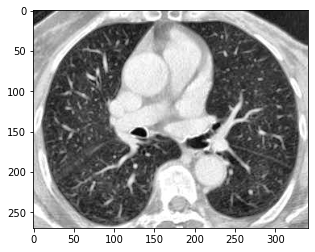

In [58]:
folder = join(testing_dir, random.choice(os.listdir(testing_dir)))
print(folder)
image = random.choice(os.listdir(folder))

img_path = join(folder, image)
img = imread(img_path)
plt.imshow(img, cmap = 'gray')

In [59]:
for File in os.listdir(ext_dir):
  shutil.rmtree(join(ext_dir,File))

In [64]:
os.chdir(ext_dir)

# Preprocessing the testing dataset




In [65]:
!wget https://github.com/UCSD-AI4H/COVID-CT/raw/master/Images-processed/CT_COVID.zip
!wget https://github.com/UCSD-AI4H/COVID-CT/raw/master/Images-processed/CT_NonCOVID.zip

--2020-09-15 09:36:39--  https://github.com/UCSD-AI4H/COVID-CT/raw/master/Images-processed/CT_COVID.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/UCSD-AI4H/COVID-CT/master/Images-processed/CT_COVID.zip [following]
--2020-09-15 09:36:39--  https://raw.githubusercontent.com/UCSD-AI4H/COVID-CT/master/Images-processed/CT_COVID.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47929914 (46M) [application/zip]
Saving to: ‘CT_COVID.zip’

CT_COVID.zip        100%[===================>]  45.71M  54.3MB/s    in 0.8s    

2020-09-15 09:36:40 (54.3 MB/s) - ‘CT_COVID.zip’ saved [47929914/47929914]

--2020-

In [67]:
path = '/content/raw/extracted/CT_COVID.zip'
f = ZipFile(path, 'r')
f.extractall(ext_dir)

path = '/content/raw/extracted/CT_NonCOVID.zip'
f = ZipFile(path, 'r')
f.extractall(ext_dir)

In [68]:
shutil.rmtree('/content/raw/extracted/__MACOSX')

In [69]:
preprocess2('/content/raw/extracted/CT_COVID', validation_covid_dir)
preprocess2('/content/raw/extracted/CT_NonCOVID', validation_normal_dir)

/content/datasets/testing/normal


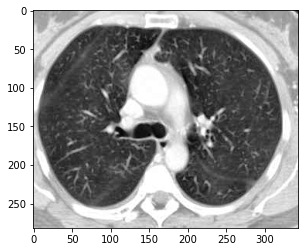

In [70]:
folder = join(testing_dir, random.choice(os.listdir(validation_dir)))
print(folder)
image = random.choice(os.listdir(folder))

img_path = join(folder, image)
img = imread(img_path)
plt.imshow(img, cmap = 'gray')

In [82]:
os.chdir('/content')

In [83]:
shutil.make_archive(base_name= 'CLAHE_preprocessed_dataset', format = 'zip', root_dir= '/content', base_dir='datasets', verbose =2)

'/content/CLAHE_preprocessed_dataset.zip'

In [85]:
shutil.copy('/content/CLAHE_preprocessed_dataset.zip', '/content/drive/My Drive/External Datasets/COVID19-Project')

'/content/drive/My Drive/External Datasets/COVID19-Project/CLAHE_preprocessed_dataset.zip'